In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
sub_example = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

print("This is how your submission should look like:\n")
sub_example.head()

This is how your submission should look like:



,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


We want to predict if the passanger survived or not

In [3]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape, test.shape

((891, 12), (418, 11))

In [5]:
ex_ticket = []
ticket_num = []

for i in range(train.shape[0]):
    arr = train.iloc[i]['Ticket'].split(" ")
    
    if len(arr) == 1:
        ex_ticket.append(" ")
    else:
        ex_ticket.append(arr[0])
    
    ticket_num.append(arr[-1])

In [6]:
ex_ticket_1 = []
ticket_num_1 = []

for i in range(test.shape[0]):
    arr = test.iloc[i]['Ticket'].split(" ")
    
    if len(arr) == 1:
        ex_ticket_1.append(" ")
    else:
        ex_ticket_1.append(arr[0])
    
    ticket_num_1.append(arr[-1])

In [7]:
train.drop(labels=['Ticket'], inplace=True, axis=1)
train['ex_ticket'] = ex_ticket
train['ticket_num'] = ticket_num

In [8]:
test.drop(labels=['Ticket'], inplace=True, axis=1)
test['ex_ticket'] = ex_ticket_1
test['ticket_num'] = ticket_num_1

In [9]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,ex_ticket,ticket_num
669,670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,NaN,1,0,52.0000,C126,S,,19996
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,81.8583,A34,S,,33638
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,56.4958,NaN,S,,1601
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,25.4667,NaN,S,,4133
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,10.5000,NaN,S,C.A.,31026
580,581,1,2,"Christy, Miss. Julie Rachel",female,25.0,1,1,30.0000,NaN,S,,237789
800,801,0,2,"Ponesell, Mr. Martin",male,34.0,0,0,13.0000,NaN,S,,250647
537,538,1,1,"LeRoy, Miss. Bertha",female,30.0,0,0,106.4250,NaN,C,PC,17761
418,419,0,2,"Matthews, Mr. William John",male,30.0,0,0,13.0000,NaN,S,,28228
784,785,0,3,"Ali, Mr. William",male,25.0,0,0,7.0500,NaN,S,SOTON/O.Q.,3101312


In [10]:
train.drop(labels=['Name'], inplace=True, axis=1)
test.drop(labels=['Name'], inplace=True, axis=1)

In [11]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,ex_ticket,ticket_num
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,A/5,21171
1,2,1,1,female,38.0,1,0,71.2833,C85,C,PC,17599
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,STON/O2.,3101282
3,4,1,1,female,35.0,1,0,53.1000,C123,S,,113803
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,,373450


In [12]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,ex_ticket,ticket_num
0,892,3,male,34.5,0,0,7.8292,NaN,Q,,330911
1,893,3,female,47.0,1,0,7.0000,NaN,S,,363272
2,894,2,male,62.0,0,0,9.6875,NaN,Q,,240276
3,895,3,male,27.0,0,0,8.6625,NaN,S,,315154
4,896,3,female,22.0,1,1,12.2875,NaN,S,,3101298


In [13]:
for col in train:
    if train[col].dtype == 'object':
        train[col] = train[col].factorize()[0]
        
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [14]:
for col in test:
    if test[col].dtype == 'object':
        test[col] = test[col].factorize()[0]
        
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [15]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,ex_ticket,ticket_num
0,1,0,3,0,22.0,1,0,7.2500,-1,0,0,0
1,2,1,1,1,38.0,1,0,71.2833,0,1,1,1
2,3,1,3,1,26.0,0,0,7.9250,-1,0,2,2
3,4,1,1,1,35.0,1,0,53.1000,1,0,3,3
4,5,0,3,0,35.0,0,0,8.0500,-1,0,3,4


In [16]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,ex_ticket,ticket_num
0,892,3,0,34.5,0,0,7.8292,-1,0,0,0
1,893,3,1,47.0,1,0,7.0000,-1,1,0,1
2,894,2,0,62.0,0,0,9.6875,-1,0,0,2
3,895,3,0,27.0,0,0,8.6625,-1,1,0,3
4,896,3,1,22.0,1,1,12.2875,-1,1,0,4


array([[<AxesSubplot: title={'center': 'PassengerId'}>,
        <AxesSubplot: title={'center': 'Survived'}>,
        <AxesSubplot: title={'center': 'Pclass'}>],
       [<AxesSubplot: title={'center': 'Sex'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'SibSp'}>],
       [<AxesSubplot: title={'center': 'Parch'}>,
        <AxesSubplot: title={'center': 'Fare'}>,
        <AxesSubplot: title={'center': 'Cabin'}>],
       [<AxesSubplot: title={'center': 'Embarked'}>,
        <AxesSubplot: title={'center': 'ex_ticket'}>,
        <AxesSubplot: title={'center': 'ticket_num'}>]], dtype=object)

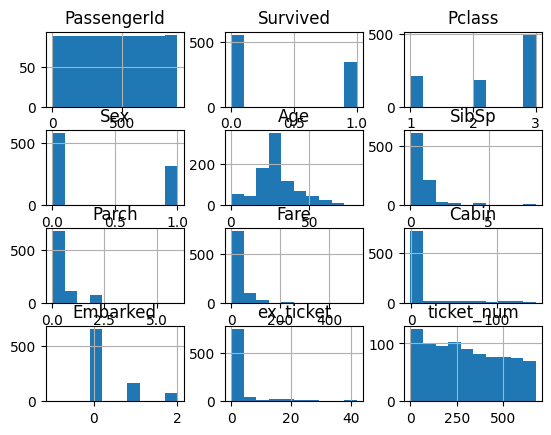

In [17]:
train.hist()

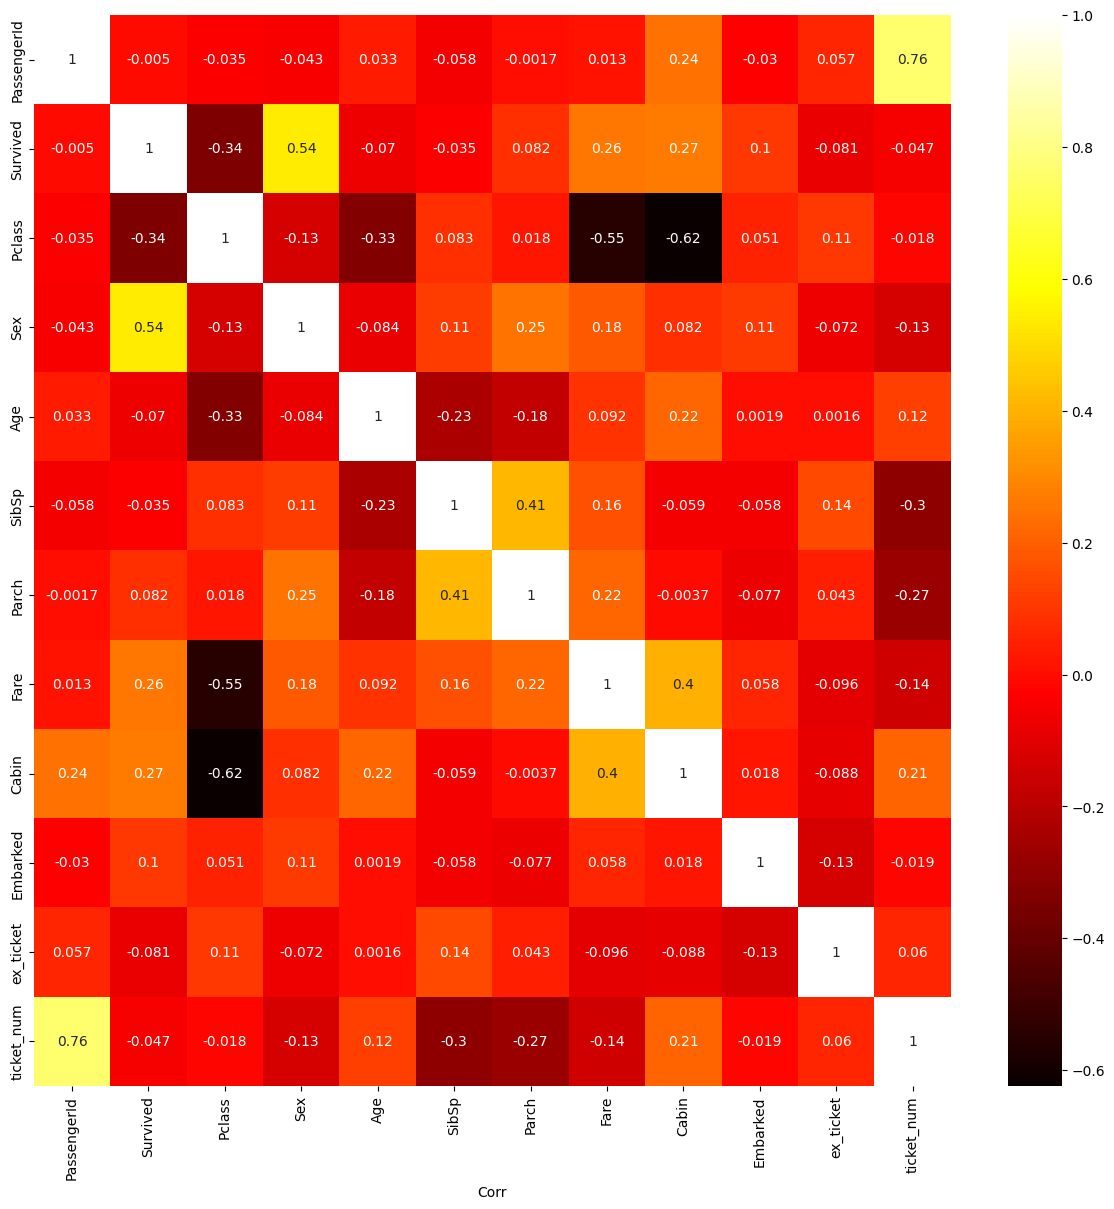

In [18]:
figure = plt.figure(figsize=(12, 12))
sns.heatmap(train.corr(), annot=True,cmap=plt.cm.hot)
plt.tight_layout()
plt.xlabel('Corr')
plt.show()

In [19]:
# Normalize Data

from sklearn import preprocessing

x = train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train = pd.DataFrame(x_scaled)

In [20]:
from sklearn.model_selection import train_test_split

# X_train, X_valid, y_train, y_valid = train_test_split(train.loc[:,~train.columns.isin(['Survived', 'PassengerId'])], train['Survived'], test_size=0.3)
X_train, X_valid, y_train, y_valid = train_test_split(train.loc[:,~train.columns.isin([0,1])], train[1], test_size=0.3)

In [21]:
# Let's apply Logistic Regression to establish a baseline accuracy

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter = 10000).fit(X_train, y_train)

preds = LR.predict(X_valid)

correct = 0

for i, pred in enumerate(preds):
    if pred == y_valid.iloc[i]:
        correct += 1
        
print(correct/len(preds))

0.8022388059701493


In [22]:
# Let's apply Decision Trees

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=5)

tree_clf.fit(X_train,y_train)

preds = tree_clf.predict(X_valid)

correct = 0

for i, pred in enumerate(preds):
    if pred == y_valid.iloc[i]:
        correct += 1
        
print(correct/len(preds))

0.7723880597014925


In [23]:
# Try Using Catboost Regressor

from catboost import CatBoostClassifier

model = CatBoostClassifier(silent=True)

model.fit(X_train, y_train)

preds = model.predict(X_valid)

correct = 0

for i, pred in enumerate(preds):
    if pred == y_valid.iloc[i]:
        correct += 1
        
print(correct/len(preds))

0.8208955223880597


In [24]:
# Implement Random Forest Regressor

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

preds = model.predict(X_valid)

correct = 0

for i, pred in enumerate(preds):
    if pred == y_valid.iloc[i]:
        correct += 1
        
print(correct/len(preds))

0.8208955223880597


In [25]:
# Hyper Parameter Tuning for RF Model

import optuna

def objective(trial):
    
    # Split the Data Each time
#     X_train, X_valid, y_train, y_valid = train_test_split(train.loc[:,~train.columns.isin(['Survived', 'PassangerId'])], train['Survived'], test_size=0.3)
    X_train, X_valid, y_train, y_valid = train_test_split(train.loc[:,~train.columns.isin([0,1])], train[1], test_size=0.3)
    
    # Set the Parameters
    n_estimators = trial.suggest_int('n_estimators', 2, 200)
    max_depth = int(trial.suggest_int('max_depth', 1, 32))
    
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    model.fit(X_train, y_train)
    
    preds = model.predict(X_valid)

    preds = model.predict(X_valid)

    correct = 0

    for i, pred in enumerate(preds):
        if pred == y_valid.iloc[i]:
            correct += 1

    return correct/len(preds)

In [26]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

[I 2023-05-22 12:02:46,332] A new study created in memory with name: no-name-a9dd5f99-4f3f-400a-b5ec-3874c3aeebc3
[I 2023-05-22 12:02:46,896] Trial 0 finished with value: 0.8208955223880597 and parameters: {'n_estimators': 177, 'max_depth': 12}. Best is trial 0 with value: 0.8208955223880597.
[I 2023-05-22 12:02:47,016] Trial 1 finished with value: 0.8395522388059702 and parameters: {'n_estimators': 34, 'max_depth': 25}. Best is trial 1 with value: 0.8395522388059702.
[I 2023-05-22 12:02:47,407] Trial 2 finished with value: 0.8283582089552238 and parameters: {'n_estimators': 119, 'max_depth': 30}. Best is trial 1 with value: 0.8395522388059702.
[I 2023-05-22 12:02:47,806] Trial 3 finished with value: 0.8246268656716418 and parameters: {'n_estimators': 123, 'max_depth': 21}. Best is trial 1 with value: 0.8395522388059702.
[I 2023-05-22 12:02:48,259] Trial 4 finished with value: 0.835820895522388 and parameters: {'n_estimators': 141, 'max_depth': 27}. Best is trial 1 with value: 0.839552

In [27]:
study.best_params, study.best_value

({'n_estimators': 30, 'max_depth': 14}, 0.8880597014925373)

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
import warnings

warnings.simplefilter('ignore', FutureWarning)

model = GradientBoostingClassifier(max_depth=7, max_features='auto', n_estimators=500, subsample=0.5, learning_rate=0.065).fit(X_train, y_train)

preds = model.predict(X_valid)

correct = 0

for i, pred in enumerate(preds):
    if pred == y_valid.iloc[i]:
        correct += 1
        
print(correct/len(preds))

0.8134328358208955


In [29]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, layers

In [30]:
model = Sequential()

model.add(layers.Dense(100, activation='relu', input_shape=(10,)))

# model.add(layers.Dropout(.1))

model.add(layers.Dense(200, activation='relu'))

model.add(layers.Dense(200, activation='relu'))

model.add(layers.Dense(100, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(X_train, y_train, epochs=200, batch_size=10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1100      
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 100)               20100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 81,701
Trainable params: 81,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
63/63 [==============================] -

In [31]:
preds = model.predict(X_valid)

correct = 0

for i, pred in enumerate(preds):
    temp = 0
    if pred[0] >= 0.5:
        temp = 1
    
    if temp == y_valid.iloc[i]:
        correct += 1
        
print(correct/len(preds))

9/9 [==============================] - 0s 2ms/step
0.7947761194029851
